File: DSC680_Final_Project_1_Code_ARybinski.ipynb
Name: Adrian Rybinski
Date: Sept 24, 2022
Course: DSC 680 - Applied Data Science
Assignment: Final Project 1
Desc: Final Project 1

Importing data and preparing for data visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
import yellowbrick
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Read the CSV file
addr1 = "C://Users/smerf/Desktop/School Work/DSC680/Project2/hmda_lar_bank.csv"
full_hmda = pd.read_csv(addr1)

In [4]:
# Check the dimension of the table
print("The dimension of the table is: ", full_hmda.shape)

The dimension of the table is:  (630281, 99)


In [5]:
# Look at the data
print(full_hmda.head(5))
full_hmda.info()

   activity_year                   lei  derived_msa_md state_code  \
0           2018  549300SUCQ1358EGVE89           36100         FL   
1           2018  549300V3UW6HP83URS67           28020         MI   
2           2018  549300U3721PJGQZYY68           99999         NC   
3           2018  549300VYK2WBD7SST478           99999         AR   
4           2018  549300S1ULK3TJQ8I652           31084         CA   

   county_code  census_tract conforming_loan_limit  \
0      12083.0  1.208300e+10                     C   
1      26077.0  2.607700e+10                     C   
2      37039.0  3.703993e+10                     C   
3       5057.0  5.057480e+09                     C   
4       6037.0  6.037501e+09                     C   

       derived_loan_product_type               derived_dwelling_category  \
0                 FHA:First Lien    Single Family (1-4 Units):Site-Built   
1        Conventional:First Lien    Single Family (1-4 Units):Site-Built   
2        Conventional:First Lien

In [6]:
#Pull in the data columns needed for the model
hmda = full_hmda[['income', 'derived_race', 'derived_sex', 'property_value', 'action_taken']]

In [7]:
# Look at the data
print(hmda.head(5))
hmda.info()

   income derived_race derived_sex  property_value  action_taken
0   10000    Non-White      Female           75000             3
1   10000    Non-White      Female           45000             1
2   10000    Non-White      Female          125000             3
3   10000        White      Female           55000             1
4   10000        White      Female          405000             1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630281 entries, 0 to 630280
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   income          630281 non-null  int64 
 1   derived_race    630281 non-null  object
 2   derived_sex     630281 non-null  object
 3   property_value  630281 non-null  int64 
 4   action_taken    630281 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 24.0+ MB


In [8]:
#Change approval codes to strings for easier determination
approval_code = {1: 'Yes', 2: 'No', 3: 'No', 4: 'No', 5: 'No', 6: 'No', 7: 'No', 8: 'No', 9: 'No'}
hmda.action_taken = hmda['action_taken'].map(approval_code)

In [9]:
# Look at the data
print(hmda.head(5))
hmda.info()

   income derived_race derived_sex  property_value action_taken
0   10000    Non-White      Female           75000           No
1   10000    Non-White      Female           45000          Yes
2   10000    Non-White      Female          125000           No
3   10000        White      Female           55000          Yes
4   10000        White      Female          405000          Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630281 entries, 0 to 630280
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   income          630281 non-null  int64 
 1   derived_race    630281 non-null  object
 2   derived_sex     630281 non-null  object
 3   property_value  630281 non-null  int64 
 4   action_taken    630281 non-null  object
dtypes: int64(2), object(3)
memory usage: 24.0+ MB


In [10]:
#Change acttion taken column name to approved
hmda.rename(columns = {'action_taken': 'approved'}, inplace = True)

In [11]:
#Change some date to categories
hmda[['derived_race', 'derived_sex', 'approved']] = hmda[['derived_race', 'derived_sex', 'approved']].astype('category')

In [12]:
# Look at the data
print(hmda.head(5))
hmda.info()

   income derived_race derived_sex  property_value approved
0   10000    Non-White      Female           75000       No
1   10000    Non-White      Female           45000      Yes
2   10000    Non-White      Female          125000       No
3   10000        White      Female           55000      Yes
4   10000        White      Female          405000      Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630281 entries, 0 to 630280
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   income          630281 non-null  int64   
 1   derived_race    630281 non-null  category
 2   derived_sex     630281 non-null  category
 3   property_value  630281 non-null  int64   
 4   approved        630281 non-null  category
dtypes: category(3), int64(2)
memory usage: 11.4 MB


In [13]:
#change income and property value fields to be yes/no if above certain amount to ilustrate wealthier individuals
hmda['High_Income'] = ['Yes' if a >= 500000 else 'No' for a in hmda['income']]
hmda['High_Value'] = ['Yes' if a >= 350000 else 'No' for a in hmda['property_value']]

In [14]:
# Look at the data
print(hmda.head(5))
hmda.info()

   income derived_race derived_sex  property_value approved High_Income  \
0   10000    Non-White      Female           75000       No          No   
1   10000    Non-White      Female           45000      Yes          No   
2   10000    Non-White      Female          125000       No          No   
3   10000        White      Female           55000      Yes          No   
4   10000        White      Female          405000      Yes          No   

  High_Value  
0         No  
1         No  
2         No  
3         No  
4        Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630281 entries, 0 to 630280
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   income          630281 non-null  int64   
 1   derived_race    630281 non-null  category
 2   derived_sex     630281 non-null  category
 3   property_value  630281 non-null  int64   
 4   approved        630281 non-null  category
 5   High_Income    

In [15]:
#Pull in the data columns needed for the charts
hmda = hmda[['property_value', 'income', 'High_Income', 'High_Value', 'derived_race', 'derived_sex', 'approved']]

In [16]:
#Change some date to categories
hmda[['derived_race', 'derived_sex', 'approved', 'High_Income', 'High_Value']] = hmda[['derived_race', 'derived_sex', 'approved', 'High_Income', 'High_Value']].astype('category')

In [17]:
# Look at the data
print(hmda.head(5))
hmda.info()

   property_value  income High_Income High_Value derived_race derived_sex  \
0           75000   10000          No         No    Non-White      Female   
1           45000   10000          No         No    Non-White      Female   
2          125000   10000          No         No    Non-White      Female   
3           55000   10000          No         No        White      Female   
4          405000   10000          No        Yes        White      Female   

  approved  
0       No  
1      Yes  
2       No  
3      Yes  
4      Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630281 entries, 0 to 630280
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   property_value  630281 non-null  int64   
 1   income          630281 non-null  int64   
 2   High_Income     630281 non-null  category
 3   High_Value      630281 non-null  category
 4   derived_race    630281 non-null  category
 5   derived_sex    

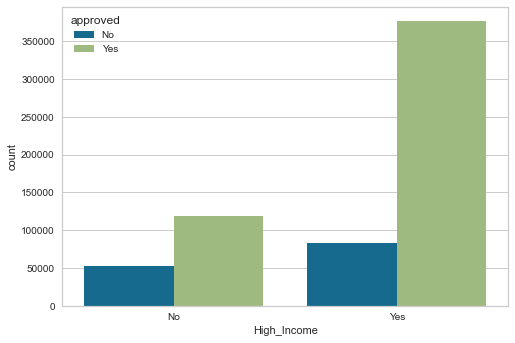

In [18]:
#Making a histogram of the number of observations based on the income variable
sns.countplot(x = 'High_Income', data = hmda, hue = 'approved')
plt.show()

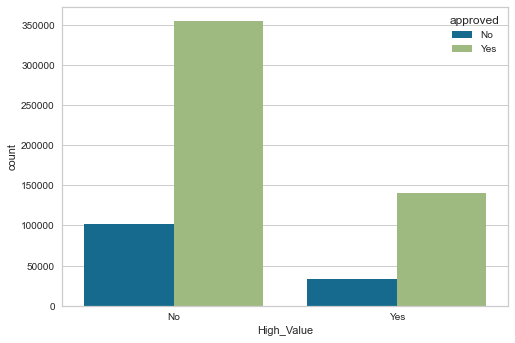

In [19]:
#Making a histogram of the number of observations based on the value variable
sns.countplot(x = 'High_Value', data = hmda, hue = 'approved')
plt.show()

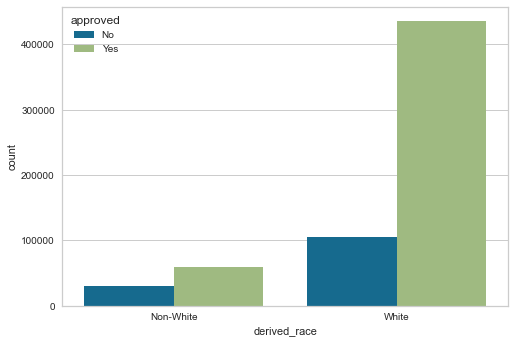

In [20]:
#Making a histogram of the number of observations based on the race variable
sns.countplot(x = 'derived_race', data = hmda, hue = 'approved')
plt.show()

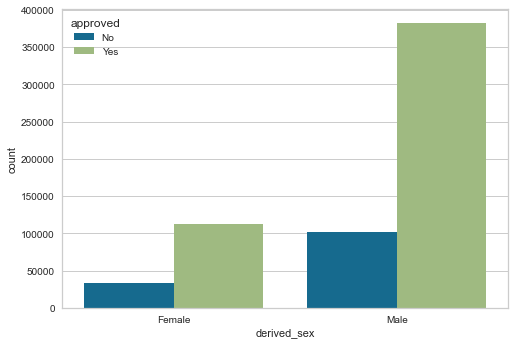

In [21]:
#Making a histogram of the number of observations based on the sex/gender variable
sns.countplot(x = 'derived_sex', data = hmda, hue = 'approved')
plt.show()

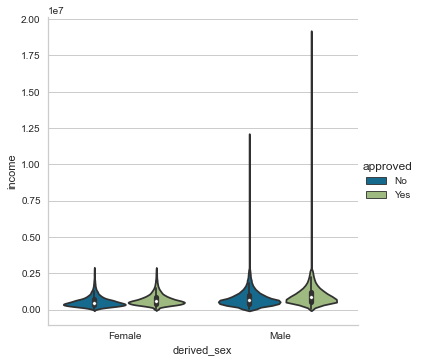

In [22]:
#Making a swarm plot based on the approved, property value and sex variables
sns.catplot(x = 'derived_sex', y = 'income', data = hmda, kind = 'violin', hue = 'approved')
plt.show()

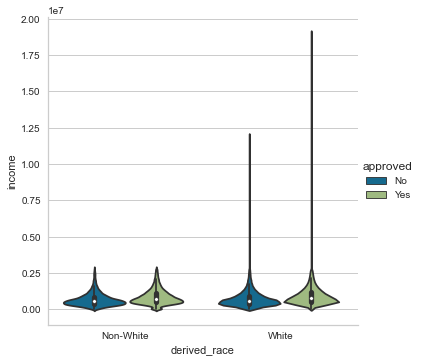

In [23]:
#Making a swarm plot based on the approved, property value and sex variables
sns.catplot(x = 'derived_race', y = 'income', data = hmda, kind = 'violin', hue = 'approved')
plt.show()

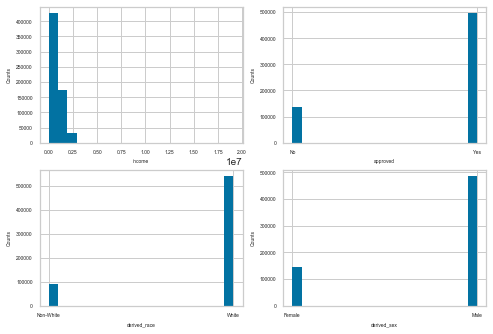

In [24]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['income', 'approved', 'derived_race', 'derived_sex']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(hmda[num_features[idx]].dropna(), bins=20)
    ax.set_xlabel(xaxes[idx], fontsize=5)
    ax.set_ylabel(yaxes[idx], fontsize=5)
    ax.tick_params(axis='both', labelsize=5)
plt.show()

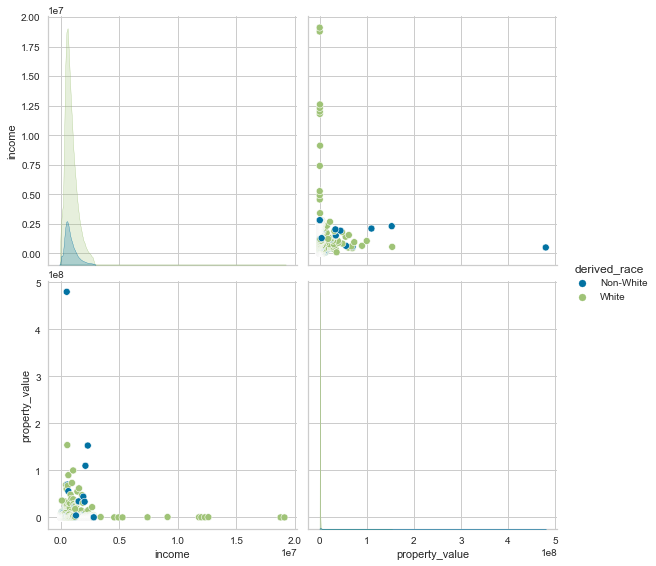

In [25]:
#Making a pair plot that shows a correlation of income and property values variables
sns.pairplot(hmda, height = 4, vars = ['income', 'property_value'], hue = 'derived_race')

Model Design and Fit

In [26]:
#Pull in the data columns needed for the charts
modelhmda = hmda[['High_Income', 'High_Value', 'derived_race', 'derived_sex', 'approved']]

In [27]:
#Change approval codes to 2 options for approved (0) and not (1)
approval_code = {'Yes': 0, 'No': 1}
modelhmda.approved = modelhmda['approved'].map(approval_code)

#Change approval codes to 2 options for approved (1) and not (2)
sex = {'Male': 0, 'Female': 1}
modelhmda.derived_sex = modelhmda['derived_sex'].map(sex)

#Change race codes to 2 options
race = {'White': 0, 'Non-White': 1}
modelhmda.derived_race = modelhmda['derived_race'].map(race)

#Change high income codes to 2 options for yes or no
high_income = {'Yes': 0, 'No': 1}
modelhmda.High_Income = modelhmda['High_Income'].map(high_income)

#Change high value codes to 2 options for yes or no
high_value = {'Yes': 0, 'No': 1}
modelhmda.High_Value = modelhmda['High_Value'].map(high_value)

In [28]:
#Change some date to categories
modelhmda[['derived_race', 'derived_sex', 'approved', 'High_Income', 'High_Value']] = modelhmda[['derived_race', 'derived_sex', 'approved', 'High_Income', 'High_Value']].astype('category')

In [29]:
# Look at the data
print(modelhmda.head(5))
modelhmda.info()

  High_Income High_Value derived_race derived_sex approved
0           1          1            1           1        1
1           1          1            1           1        0
2           1          1            1           1        1
3           1          1            0           1        0
4           1          0            0           1        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630281 entries, 0 to 630280
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   High_Income   630281 non-null  category
 1   High_Value    630281 non-null  category
 2   derived_race  630281 non-null  category
 3   derived_sex   630281 non-null  category
 4   approved      630281 non-null  category
dtypes: category(5)
memory usage: 3.0 MB


In [30]:
#Allocating the x and y values from the dataframe and splitting out training set
X = modelhmda.iloc[:, :-1]
y = modelhmda.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [31]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.785948 (0.000002)
LDA: 0.785948 (0.000002)
KNN: 0.762140 (0.032113)
CART: 0.785948 (0.000002)
NB: 0.755361 (0.001234)
SVM: 0.785948 (0.000002)


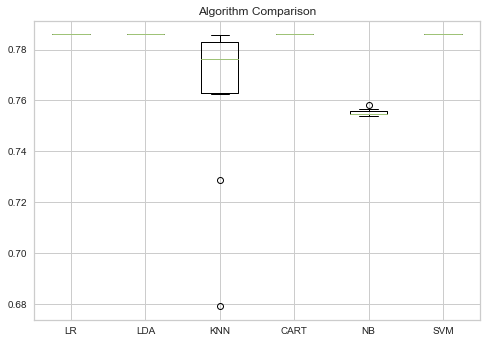

In [32]:
# compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Run Preditcions

In [37]:
# make predictions on validation dataset - Linear regression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [38]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.7847243707211817
[[98920     0]
 [27137     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     98920
           1       0.00      0.00      0.00     27137

    accuracy                           0.78    126057
   macro avg       0.39      0.50      0.44    126057
weighted avg       0.62      0.78      0.69    126057



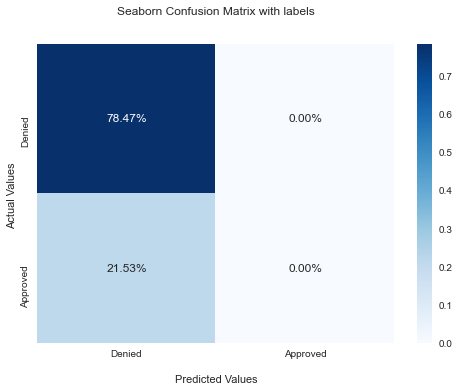

In [39]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['Denied','Approved'])
ax.yaxis.set_ticklabels(['Denied','Approved'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
# make predictions on validation dataset - decision tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [41]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.7847243707211817
[[98920     0]
 [27137     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     98920
           1       0.00      0.00      0.00     27137

    accuracy                           0.78    126057
   macro avg       0.39      0.50      0.44    126057
weighted avg       0.62      0.78      0.69    126057



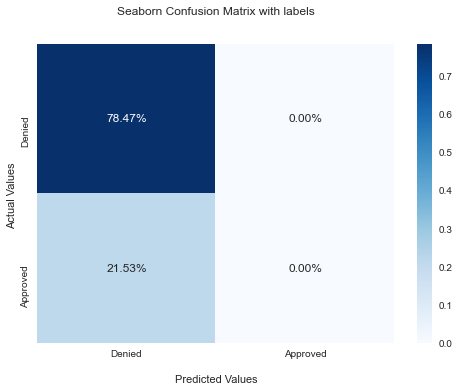

In [42]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['Denied','Approved'])
ax.yaxis.set_ticklabels(['Denied','Approved'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
# make predictions on validation dataset - KNN
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [45]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.781233886257804
[[97331  1589]
 [25988  1149]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     98920
           1       0.42      0.04      0.08     27137

    accuracy                           0.78    126057
   macro avg       0.60      0.51      0.48    126057
weighted avg       0.71      0.78      0.70    126057



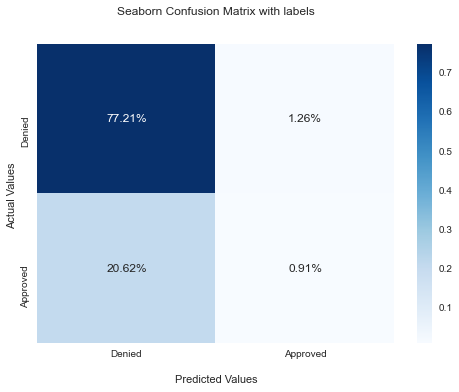

In [46]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['Denied','Approved'])
ax.yaxis.set_ticklabels(['Denied','Approved'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
#added another model type to see if the preditctions are more accurtate
from sklearn.ensemble import AdaBoostClassifier

In [48]:
# make predictions on validation dataset - ADA
model = AdaBoostClassifier(random_state = 0,)
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [49]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.7847243707211817
[[98920     0]
 [27137     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     98920
           1       0.00      0.00      0.00     27137

    accuracy                           0.78    126057
   macro avg       0.39      0.50      0.44    126057
weighted avg       0.62      0.78      0.69    126057



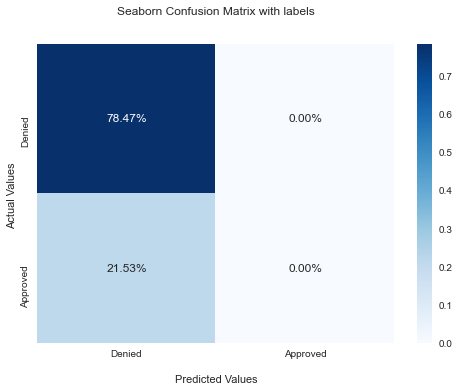

In [50]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['Denied','Approved'])
ax.yaxis.set_ticklabels(['Denied','Approved'])

## Display the visualization of the Confusion Matrix.
plt.show()